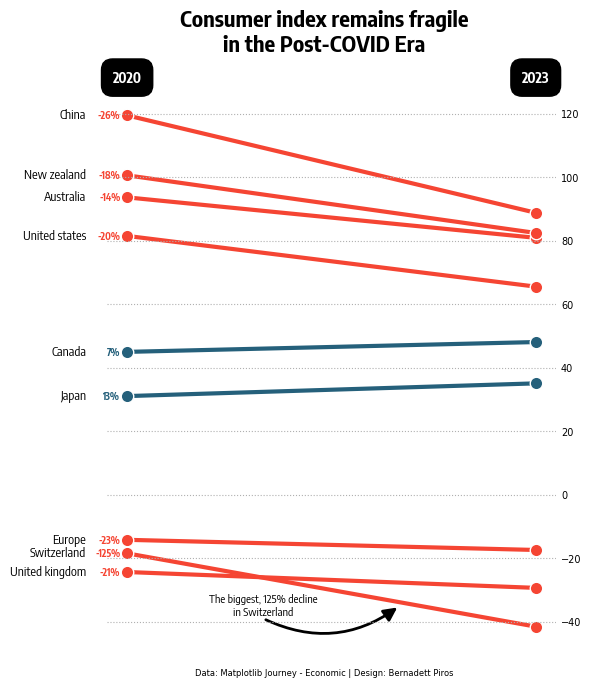

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pyfonts import load_font
from drawarrow import ax_arrow

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/economic/economic.csv"
df = pd.read_csv(url)

econ_bold=load_font("https://github.com/google/fonts/blob/main/ofl/encodesanscondensed/EncodeSansCondensed-Bold.ttf?raw=true")
econ_regular=load_font("https://github.com/google/fonts/blob/main/ofl/encodesanscondensed/EncodeSansCondensed-Regular.ttf?raw=true")

df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["country"] = df["country"].str.capitalize()
df = df[(df["year"]==2020)|(df["year"]==2023)]
df = df[["year", "country", "consumer confidence"]]
df = df.groupby(["year", "country"]).mean().sort_values("country").reset_index()
df["pct_change"] = (df.groupby(["country"])["consumer confidence"]
                    .pct_change().round(2)*100)

for i in range(1, len(df)):
    if df["consumer confidence"][i] < 0 and df["consumer confidence"][i-1] < 0:
        df.loc[i, "pct_change"] = -abs(df.loc[i, "pct_change"])

color_mapping = {
  True: "#25607b",
  False: "#f54533"}
colors = (df["pct_change"].dropna()>0).map(color_mapping)

fig, ax = plt.subplots(figsize=(5.8, 7.6), facecolor = "#FFFFFF")
plt.subplots_adjust(top=0.85)

ax.grid(axis="y", ls="dotted", zorder=-3)

for color, country, pct in zip(colors, df["country"].unique(), df["pct_change"]):
    temp_df = df[df['country'] == country]
    x = temp_df['year']
    y = temp_df['consumer confidence']  
    
    ax.plot(x, y,"-o", markersize=9, lw=3, color=color, markeredgecolor="white", clip_on=False, zorder=1)
    
    ax.text(x.iloc[0]-0.3, y.iloc[0], country, va='center', ha="right", font=econ_regular, fontsize=9, clip_on=False)
    
    for i in range(1, len(temp_df)):
        if pd.notna(temp_df['pct_change'].iloc[i]):
            ax.text(temp_df['year'].iloc[0]-0.05, temp_df['consumer confidence'].iloc[0],
                    f"{temp_df['pct_change'].iloc[i]:.0f}%", color=color, font=econ_bold, fontsize=7, ha="right", va='center', clip_on=False)
            
ax.spines[["top", "bottom", "left", "right"]].set_visible(False)
ax.tick_params(length=0)

location=[2020.0, 2023.0]
labels=[2020, 2023]
ax.set_xticks(location, labels=labels)

for years, xticks in zip(df['year'], location):
    ax.text(s=years, x=xticks, y=130, color="white", font=econ_bold, clip_on=False, ha="center", bbox=dict(boxstyle='round,pad=0.8', facecolor="black"))

plt.xticks([])
ax.yaxis.tick_right()
ax.tick_params(
  axis="y",
  labelsize=7
)

fig.text(0.5, 0.9, "Consumer index remains fragile\nin the Post-COVID Era", fontsize=16, font=econ_bold,  ha="center")

ax_arrow([2021, -39], [2022, -35], radius=0.3, width=2, color="black", ax=ax)

ax.text(2021, -38, "The biggest, 125% decline\nin Switzerland", font=econ_regular, fontsize=8, ha="center")

fig.text(0.5, 0.08, "Data: Matplotlib Journey - Economic | Design: Bernadett Piros",
         size=6, ha="center")

plt.show()

#plt.savefig("slope_economic", dpi=300, bbox_inches='tight', pad_inches=0.2)